<a href="https://colab.research.google.com/github/j23-cs167/notebook-6-xrays-Venamax21/blob/main/Notebook6_vena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \# 6
Name:VANLAL VENA
Date:

## Problem Description:



### Hints/ Tips Tricks
- Don't forget to enable GPUs under 'Edit', 'Notebook Settings', 'Accerlate Hardware', 'GPU'.
- Make sure you unzip the data and put it in your Drive.


In [1]:
import keras
import tensorflow 
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

## Connect to Drive
from google.colab import drive
import pandas
drive.mount('/content/drive')

## Image dimensions
img_width = 200
img_height = 200

## Directories for testing and training data
train_data_dir = '/content/drive/MyDrive/ColabNotebooks/CS167Datasets/chest_xray/train' 
test_data_dir = '/content/drive/MyDrive/ColabNotebooks/CS167Datasets/chest_xray/test'

## To feed the training images to the neural network in batches of 32 images at a time
batch_size = 32

## Rescale pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

## Look for training and testing data and figure out the class of each example based on subfolder
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# BASELINE CNN

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(64,activation = 'relu'))
model2.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()


In [6]:
#This will actually train the model.

training_results2 = model2.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=5, #number of epo4hs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/5


<ipython-input-6-da8f6a853e96>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_results2 = model2.fit_generator(


163/163 [==============================] - 17s 101ms/step - loss: 0.1357 - accuracy: 0.9479 - val_loss: 0.3983 - val_accuracy: 0.8333
Epoch 2/5
163/163 [==============================] - 15s 93ms/step - loss: 0.1352 - accuracy: 0.9490 - val_loss: 1.0343 - val_accuracy: 0.7131
Epoch 3/5
163/163 [==============================] - 15s 94ms/step - loss: 0.1506 - accuracy: 0.9415 - val_loss: 0.6126 - val_accuracy: 0.7772
Epoch 4/5
163/163 [==============================] - 16s 99ms/step - loss: 0.1179 - accuracy: 0.9544 - val_loss: 0.9366 - val_accuracy: 0.7163
Epoch 5/5
163/163 [==============================] - 15s 91ms/step - loss: 0.1234 - accuracy: 0.9540 - val_loss: 0.7145 - val_accuracy: 0.7692


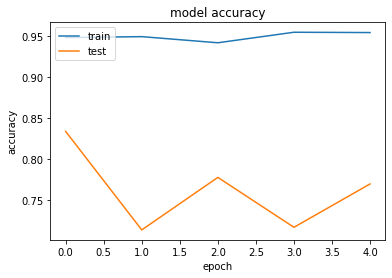

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results2.history['accuracy'])
plt.plot(training_results2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [63]:
#TUNED CNN (Parameters changed)
model3 = Sequential()
model3.add(Conv2D(64, (8, 8), activation = 'relu', input_shape=(img_width, img_height, 3)))
model3.add(MaxPooling2D(pool_size=(10, 10)))

model3.add(Conv2D(64, (8, 8),activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(10, 10)))

model3.add(Flatten())
model3.add(Dense(64,activation = 'relu'))
model3.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 193, 193, 64)      12352     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 19, 19, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 12, 12, 64)        262208    
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 1, 1, 64)         0         
 g2D)                                                            
                                                                 
 flatten_25 (Flatten)        (None, 64)                0         
                                                                 
 dense_47 (Dense)            (None, 64)              

Parameters changed: I increased the filter from 32 to 64. I also changed the kernel size to 8 by 8 instead with the pool size to 10.

In [64]:
training_results3 = model3.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=20, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

<ipython-input-64-962fcf369f40>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_results3 = model3.fit_generator(


Epoch 1/20
163/163 [==============================] - 17s 98ms/step - loss: 0.5676 - accuracy: 0.7429 - val_loss: 0.6556 - val_accuracy: 0.6250
Epoch 2/20
163/163 [==============================] - 15s 90ms/step - loss: 0.4626 - accuracy: 0.7778 - val_loss: 0.5584 - val_accuracy: 0.6506
Epoch 3/20
163/163 [==============================] - 15s 91ms/step - loss: 0.2756 - accuracy: 0.8944 - val_loss: 0.3447 - val_accuracy: 0.8494
Epoch 4/20
163/163 [==============================] - 15s 90ms/step - loss: 0.2129 - accuracy: 0.9097 - val_loss: 0.4513 - val_accuracy: 0.8045
Epoch 5/20
163/163 [==============================] - 15s 92ms/step - loss: 0.2110 - accuracy: 0.9155 - val_loss: 0.7953 - val_accuracy: 0.7019
Epoch 6/20
163/163 [==============================] - 15s 91ms/step - loss: 0.1598 - accuracy: 0.9348 - val_loss: 0.3380 - val_accuracy: 0.8734
Epoch 7/20
163/163 [==============================] - 15s 90ms/step - loss: 0.1586 - accuracy: 0.9377 - val_loss: 0.4069 - val_accuracy:

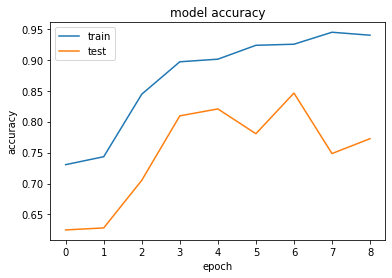

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results3.history['accuracy'])
plt.plot(training_results3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

CONCLUSIONS!
What configuration of your CNN proved to be more accurate? Why do you think this is the case? 
Did your model overfit? Why or why not?


It looks like my Tuned CNN proves to be more accurate because accuracy increases as epoch increase for the training data. Test data also constantly increases till epoch 6 and then drops down. 
My model overfits because my input variables are not significant enough. Increasing the training data size may be able to reduce overfitting.